Image captured and saved as smiling_face_20241122_230236.jpg


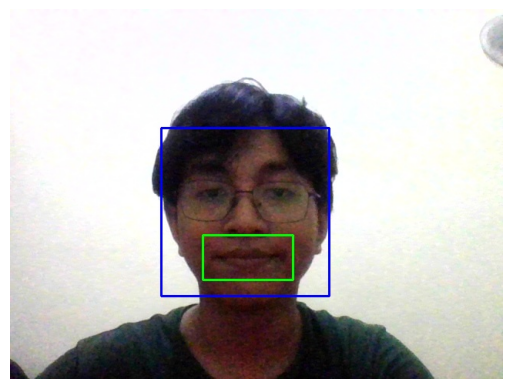

Displaying last captured image: smiling_face_20241122_230236.jpg


In [8]:
import cv2
import time
import matplotlib.pyplot as plt

# Gunakan Pretrained model haarcascade untuk wajah biasa dan senyum
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Inisiasi Webcam
cap = cv2.VideoCapture(0)

# Check web bisa dibuka atau tidak
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

last_captured_image = None  # Variabel untuk menyimpan gambar terakhir yang diambil

while True:
    # baca frame dari webcam
    ret, frame = cap.read()
    
    if not ret:
        print("Gagal untuk mengambil Frame.")
        break
    
    # Mengubah gambar menjadi grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Mendeteksi wajah dalam grayscale
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Looping setiap wajah yg ditemukan
    for (x, y, w, h) in faces:
        # Gambar kotak pada wajah
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Mendapat ROI untuk deteksi senyum
        roi_gray = gray[y:y+h, x:x+w]
        
        # Deteksi senyum pada ROI
        smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.8, minNeighbors=20, minSize=(25, 25))
        
        # Jika senyum, maka gambar ditangkan
        if len(smiles) > 0:
            # Gambar kotak pada senyum di tangkapan
            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(frame, (x + sx, y + sy), (x + sx + sw, y + sy + sh), (0, 255, 0), 2)
            
            # Menangkap gambar
            timestamp = time.strftime("%Y%m%d_%H%M%S")
            img_filename = f"smiling_face_{timestamp}.jpg"
            cv2.imwrite(img_filename, frame)
            print(f"Image captured and saved as {img_filename}")
            time.sleep(1) 
            
            # Menyimpan nama 
            last_captured_image = img_filename
    
    # Display frame 
    cv2.imshow('Smile Detection', frame)
    
    # Hentikan jika menekan q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Setelah keluar dari loop, jika ada gambar yang disimpan, tampilkan gambar terakhir
if last_captured_image:
    captured_image = cv2.imread(last_captured_image)
    
    # Mengubah gambar dari BGR (OpenCV default) menjadi RGB (untuk matplotlib)
    captured_image_rgb = cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB)
    
    # Tampilkan gambar dalam output kode menggunakan matplotlib
    plt.imshow(captured_image_rgb)
    plt.axis('off')  # Matikan sumbu
    plt.show()

    print(f"Displaying last captured image: {last_captured_image}")
    
# menghentikan webcam dan windows
cap.release()
cv2.destroyAllWindows()
